In [9]:
import pandas as pd
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor

from src.DecisionTree import DecisionTree
from src.utils import fit_predict_lr_model, get_data_without_categorical_cols

In [10]:
def load_airfoil_data():
    return pd.read_table("../Data/airfoil_self_noise.dat", header=None)

def load_servo_data():
    df = pd.read_csv("../Data/servo.data", header=None)
    for col in df.columns:
        if df[col].dtype == np.object:
            df[col] = df[col].astype('category')
    return df

def load_3d_spatial():
    df = pd.read_csv("../Data/Container_Crane_Controller_Data_Set.csv")
    return df

def load_qsar_aquatic_toxicity():
    df = pd.read_csv("../Data/qsar_aquatic_toxicity.csv", header=None)
    return df

def load_Concrete_Data():
    df = pd.read_excel("../Data/Concrete_Data.xls")
    return df

In [11]:
datas = [load_servo_data(), load_airfoil_data(), load_3d_spatial(), load_Concrete_Data(), load_qsar_aquatic_toxicity()]
leaf_size = range(5,16,5)
lr_models = [Ridge, LinearRegression]
tests = []

In [12]:
for idx, data in enumerate(datas):
    curr_dataset_test = []
    print("===========================================================")
    target_col = data.columns[-1]
    X = data.drop(columns=target_col)
    Y = data[target_col]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

    for curr_leaf_size in leaf_size:
        for curr_lr_model in lr_models:
            dt = DecisionTree(curr_lr_model, curr_leaf_size)
            dt.fit(x_train, y_train)

            if (dt.root is not None):
                preds = dt.predict(x_test)
                mse_tree = mean_squared_error(y_test, preds)
                regressor = DecisionTreeRegressor(min_samples_leaf=curr_leaf_size)
                regressor.fit(get_data_without_categorical_cols(x_train), y_train)
                preds = regressor.predict(get_data_without_categorical_cols(x_test))
                regular_tree_mse = mean_squared_error(y_test, preds)
                curr_dataset_test.append((curr_leaf_size, curr_lr_model, mse_tree, regular_tree_mse))
            else:
                print("No Tree")
                
    tests.append(curr_dataset_test)


Test 1
Test 2
Test 3
Test 4
Test 5


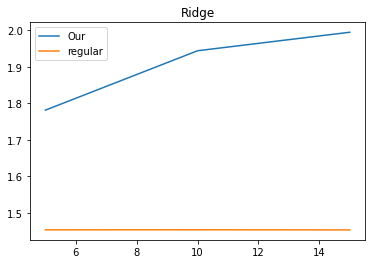

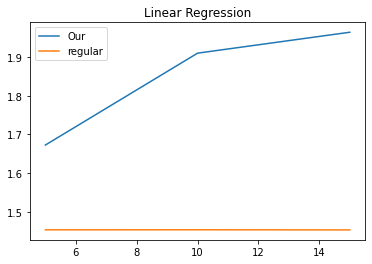

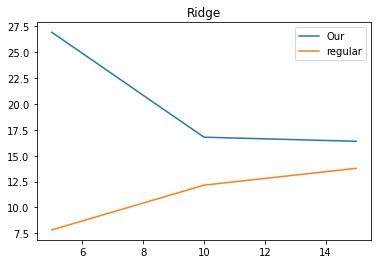

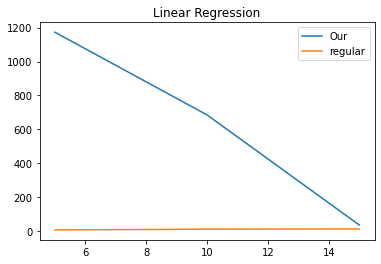

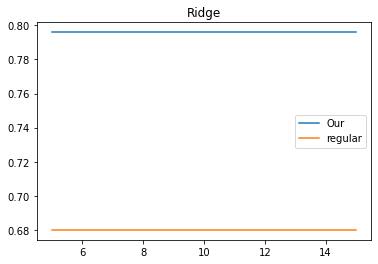

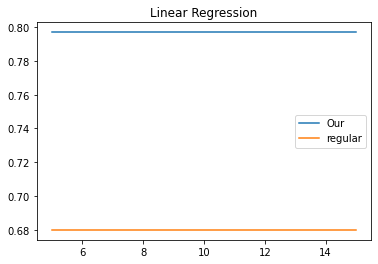

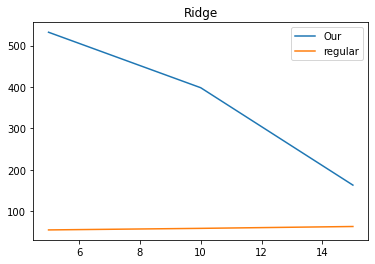

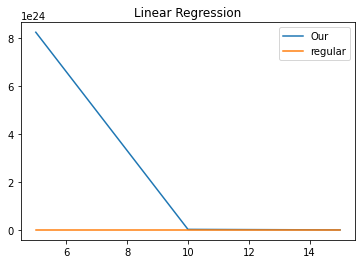

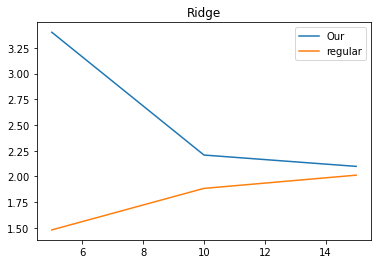

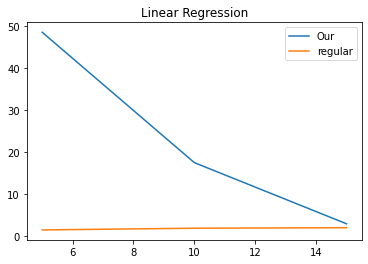

In [32]:
import matplotlib.pyplot as plt
x_axis = leaf_size
for idx, test in enumerate(tests):
    print("Test " + str(idx + 1))
    test_Ridge = list(filter(lambda x : x[1] == Ridge, test))
    test_LinearRegression = list(filter(lambda x : x[1] == LinearRegression, test))
    
    mse_my_tree = np.array(test_Ridge)[:,2]
    mse_regular_tree = np.array(test_Ridge)[:,3]
    plt.subplot()
    plt.plot(x_axis, mse_my_tree, label = 'Our')
    plt.plot(x_axis, mse_regular_tree, label = 'regular')
    plt.title("Ridge")
    plt.legend()
    plt.show()
    
    mse_my_tree = np.array(test_LinearRegression)[:,2]
    mse_regular_tree = np.array(test_LinearRegression)[:,3]
    plt.subplot()
    plt.plot(x_axis, mse_my_tree, label = 'Our')
    plt.plot(x_axis, mse_regular_tree, label = 'regular')
    plt.title("Linear Regression")
    plt.legend()
    plt.show()
    
    # for i in range(len(test)):
    #     np.array()
        
        
    
    

